In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /home/xappma/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/xappma/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
from matplotlib import pyplot, patches
import csv
import os
from PIL import Image
# from torchvision.models import ResNet101_Weights
import torch
import json
import math
import random
# from data_readers import PreprocessScratch

In [2]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [3]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 1.5917e-02, -1.5497e+00,  3.2031e-01, -2.0585e+00, -8.5747e-01,
         1.7843e+00,  1.4699e+00,  2.1626e+00,  4.4888e+00,  8.2884e-01,
        -5.7819e+00, -3.4969e+00, -4.0621e+00, -4.7517e+00, -3.8072e+00,
        -4.7243e+00, -1.2590e+00,  2.9813e-01, -2.0459e+00, -5.2885e-01,
        -3.5982e+00, -8.1425e-01, -2.7651e+00, -1.2770e+00, -3.4182e+00,
        -1.9048e+00, -3.0018e+00, -1.3471e+00, -1.8391e+00,  1.3937e+00,
        -2.0114e+00, -1.4137e+00, -2.3287e+00, -1.8198e+00, -1.1914e-01,
        -3.4102e+00, -1.6544e+00, -3.4496e+00, -2.6479e+00, -2.7407e+00,
        -2.2193e+00, -3.6509e+00, -4.1255e+00, -5.5946e+00, -1.7519e+00,
        -1.6900e+00, -9.8164e-01, -2.1251e+00, -3.5137e+00, -1.3320e+00,
        -1.1335e+00, -1.1564e+00, -2.2711e-02, -8.5797e-01, -1.2919e+00,
        -2.8682e+00,  6.6078e-01, -1.7178e+00, -1.2443e+00, -2.3362e+00,
        -5.7819e-02, -1.9204e+00, -2.5964e+00, -1.8020e+00, -1.5125e+00,
        -1.0843e+00, -4.0987e-01, -1.3090e+00, -9.4

In [4]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://raw.githubusercontent.]87imagenet_classes.txt 100% [=============================>]    5.10K    --.-KB/s87[Files: 1  Bytes: 5.10K [12.63K]8

In [5]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.8846220374107361
Arctic fox 0.045805107802152634
white wolf 0.044276218861341476
Pomeranian 0.0056213317438960075
Great Pyrenees 0.004652002360671759


In [ ]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

In [19]:
def show_picture(dataset_root_dir, number, choose_random=True):
    # with open(file, 'r', encoding='utf-8') as f:
    #     content = list(csv.reader(f, delimiter=','))[1:]

    #     if choose_random:
    #         images = random.sample(content, number)
    #     else:
    #         images = content[:number]
        files = os.listdir(dataset_root_dir)

        images = random.sample(files, number)
    
        number_cols = 3
        number_rows = math.ceil(number / number_cols)
        fig, ax = pyplot.subplots(nrows=number_rows, ncols=number_cols)
        fig.set_figwidth(5 * number_cols)
        fig.set_figheight(3 * number_rows)
        fig.tight_layout()
        
        # for index, (image_id, x, y, target_x, target_y) in enumerate(images):            
            # x, y, target_x, target_y = float(x), float(y), float(target_x), float(target_y)
        for index, image_id in enumerate(images):    
            image = Image.open(os.path.join(dataset_root_dir, image_id))
            # print(x,y)

            # x, y = recalculate_pixels((x, y), image.size, preprocess)
            # target_x, target_y = recalculate_pixels((target_x, target_y), image.size, preprocess)

            plot_x = int(index/number_cols)
            plot_y = index % number_cols

            if number_rows == 1:
                grid_coords = plot_y
            else:
                grid_coords = plot_x, plot_y

            ax[grid_coords].imshow(image)
            ax[grid_coords].set_title(image_id)
            # ax[grid_coords].add_patch(patches.Circle((x, y), 5, linewidth=2, edgecolor='r', facecolor='none'))
            # ax[grid_coords].add_patch(patches.Circle((target_x, target_y), 5, linewidth=2, edgecolor='g', facecolor='none'))

            # ax[grid_coords].text(10, 20, f'distance: {round(math.dist((x, y), (target_x, target_y)), 2)}')

        pyplot.show()

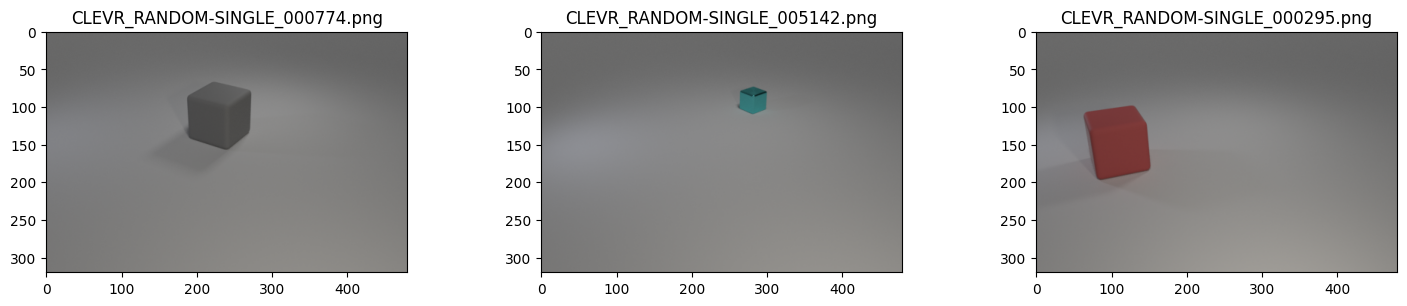

In [20]:
dataset_image_dir = '/home/xappma/clevr-single/images'
show_picture(dataset_image_dir, 3)

In [13]:
ls ~/clevr-simple/

ls: cannot access '/home/xappma/clevr-simple/': No such file or directory


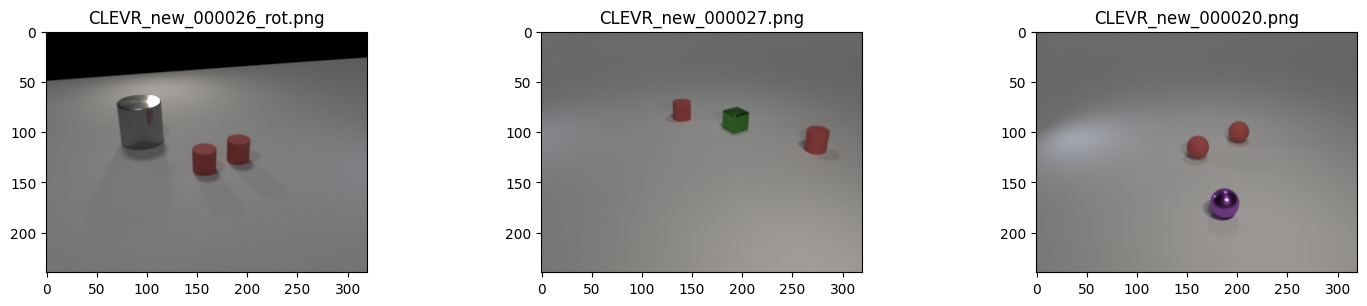

In [21]:
dataset_image_dir = '/home/xappma/spatial-dataset/output/images'
show_picture(dataset_image_dir, 3)